In [1]:
import numpy as np 
from scipy.integrate import odeint, solve_ivp 
import matplotlib.pyplot as plt 

# First-order Ordinary Differential Equations (ODEs)
The example below is obtained from <a href='https://tutorial.math.lamar.edu/classes/de/eulersmethod.aspx'>here</a>. 

## The goal of the following task is to solve the 1<sup>st</sup>-order ODE using the [Euler's method], [scipy.integrate.odeint], and [scipy.integrate.solve_ivp]. At the end, the results will be compared with the [analytical solution]. 

Given the equation of the 1st-order of ODE is: 

$y' + 2y = 2 - e^{-4 t} \rightarrow y' = 2 - 2y - e^{-4t}$

The step size is set to $0.1$ ($h = 0.1$); the initial value is $y(0)=1 \rightarrow (t, y)=(0, 1)$. 

The 1st-order ODE can be solve via Euler's method: 

$y'(n) = f(n) = \frac{y(n+1)-y(n)}{h}$

$\therefore y(n+1) = y(n) + h[f(n)]$

Concurrently, the analytical solution for this equation can be determined: 

$[y' + 2y = 2 - e^{-4t}] e^{2t} $

$y'e^{2t} + 2y e^{2t} = 2e^{2t} - e^{-4t} e^{2t} $

$[ye^{2t}]' = 2e^{2t} - e^{-2t} $

$ye^{2t} = \int dt \ 2e^{2t} - \int dt \ e^{-2t} $

$ye^{2t} = e^{2t} + \frac{e^{-2t}}{2} + c$

Since the initial condition is given such that $y(0)=1$. Hence, 

$ye^{2t} = e^{2t} + \frac{e^{-2t}}{2} + c \rightarrow (1)e^{2(0)} = e^{2(0)} + \frac{e^{-2(0)}}{2} + c \rightarrow c = -\frac{1}{2} $

$\therefore y = 1 + \frac{e^{-4t}}{2} - ce^{-2t} = 1 + \frac{e^{-4t}}{2} - \frac{e^{-2t}}{2}$

For further reference, reader is highly encouraged to refer to <a href='https://www.youtube.com/watch?v=MM3cBamj1Ms'>this video</a>. 

In [2]:
#define the 1-order ODE
def dydt(t, y):
    return 2 - 2*y - np.exp(-4*t)

Euler's method

In [3]:
step = 0.1 #step size
num = 10 #number of data
t = np.arange(0, np.round(step*num, 2), step) #range of the time
y = np.zeros(num)
y[0]=1 #initial value 

#euler method
for i in range(num-1): 
    y[i+1] = y[i] + step*(dydt(t[i], y[i]))

In [4]:
#print the result
print('t \t y')
print('-'*20)
for i in range(len(t)):
    print(np.around(t[i], 2), '\t', y[i])

t 	 y
--------------------
0.0 	 1.0
0.1 	 0.9
0.2 	 0.8529679953964361
0.3 	 0.8374414999054267
0.4 	 0.8398337787331212
0.5 	 0.8516773711870314
0.6 	 0.8678083686259638
0.7 	 0.8851748995718298
0.8 	 0.902058913394942
0.9 	 0.917570910318117


Solving via the library [scipy.integrate.odeint] and [scipy.integrate.solve_ivp]

In [5]:
y1 = odeint(dydt, y0=[1], t=t, tfirst=True)
y2 = solve_ivp(dydt, t_span=(min(t), max(t)), y0=[1], t_eval=t)

The solvers for both [scipy] library display the result in different way.

In [6]:
#print the result
print(y1)

print('-'*50)

#have the result shown in "proper" way. 
print(y1.T[0])

[[1.        ]
 [0.92579463]
 [0.88950448]
 [0.87619131]
 [0.87628378]
 [0.88372792]
 [0.89476186]
 [0.90710653]
 [0.91943282]
 [0.9310124 ]]
--------------------------------------------------
[1.         0.92579463 0.88950448 0.87619131 0.87628378 0.88372792
 0.89476186 0.90710653 0.91943282 0.9310124 ]


In [7]:
#print the result
print(y2)

print('-'*50)

#have the result shown in "proper" way. 
print(y2.y[0])

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 26
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
 t_events: None
        y: array([[1.        , 0.92573885, 0.88916443, 0.87603944, 0.87640424,
        0.88384924, 0.89481397, 0.90717531, 0.91952723, 0.93108921]])
 y_events: None
--------------------------------------------------
[1.         0.92573885 0.88916443 0.87603944 0.87640424 0.88384924
 0.89481397 0.90717531 0.91952723 0.93108921]


Calculate the actual analytical solution 

In [8]:
ansy=[]
for i in t: 
    ycal = 1 + 0.5*np.exp(-4*i) - 0.5*np.exp(-2*i)
    ansy.append(ycal)
ansy=np.array(ansy)

<IPython.core.display.Javascript object>


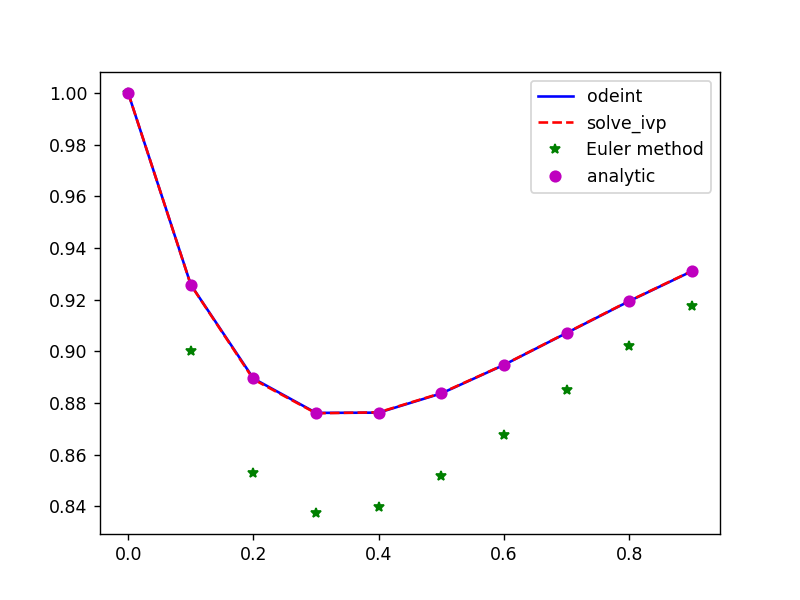

In [9]:
%matplotlib notebook
plt.figure()
plt.plot(t, y1.T[0], 'b', label='odeint')
plt.plot(t, y2.y[0], 'r--', label='solve_ivp')
plt.plot(t, y, 'g*', label='Euler method')
plt.plot(t, ansy, 'mo', label='analytic')
plt.legend(loc='best')
plt.show()

In [10]:
err1 = (ansy - y)*100 
err2 = (ansy - y1.T[0])*100 
err3 = (ansy - y2.y[0])*100

print('t \t Euler \t\t odeint \t solve_ivp') 
print('-'*50) 
for i in range(len(t)):
    print(np.round(t[i], 2), '\t', np.round(err1[i], 3), '\t\t', np.round(err2[i], 5), '\t\t', np.round(err3[i], 5))

t 	 Euler 		 odeint 	 solve_ivp
--------------------------------------------------
0.0 	 0.0 		 0.0 		 0.0
0.1 	 2.579 		 0.0 		 0.00558
0.2 	 3.654 		 -0.0 		 0.034
0.3 	 3.875 		 -0.0 		 0.01518
0.4 	 3.645 		 -0.0 		 -0.01205
0.5 	 3.205 		 0.0 		 -0.01213
0.6 	 2.695 		 0.0 		 -0.00521
0.7 	 2.193 		 0.0 		 -0.00688
0.8 	 1.737 		 0.0 		 -0.00944
0.9 	 1.344 		 0.0 		 -0.00768


In [11]:
print('compare the error of [odeint] and [solve_ivp]')
print('-'*50)
for i in range(1, len(t)):
    if np.abs(err2[i]) < np.abs(err3[i]):
        print('odeint < solve_ivp (small) \t', i)
    else:
        print('odeint > solve_ivp (big) \t', i)

compare the error of [odeint] and [solve_ivp]
--------------------------------------------------
odeint < solve_ivp (small) 	 1
odeint < solve_ivp (small) 	 2
odeint < solve_ivp (small) 	 3
odeint < solve_ivp (small) 	 4
odeint < solve_ivp (small) 	 5
odeint < solve_ivp (small) 	 6
odeint < solve_ivp (small) 	 7
odeint < solve_ivp (small) 	 8
odeint < solve_ivp (small) 	 9


From the result is showed that [Euler's method] is not reliable to solve the 1<sup>st</sup>-order ODE due to its large error compare to [scipy.integrate.odeint] and [scipy.integrate.solve_ivp]. The error can be reduced by having smaller step size ($h$). 

Besides, the result also indicate that the error from [scipy.integrate.odeint] is smaller than [scipy.integrate.solve_ivp] in general. Hence, it is encourage to use [scipy.integrate.odeint] when solving simple 1<sup>st</sup>-order ODE. 

<b>NOTE:</b> reader may adjust the step size at the begin of the code; it is label as "step". 